# K-Nearest Neighbors Classification
In this section, we will go over the KNN algorithm in classification and regression.

## Load the appropriate packages
This time we load the related packages for KNNs.

In [26]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

Let’s assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimeters.

She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species setosa, versicolor, or virginica. For these measurements, she can be certain of which species each iris belongs to. Let’s assume that these are the only species our hobby botanist will encounter in the wild.

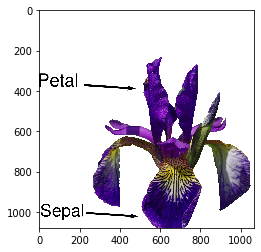

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("iris.png")
plt.imshow(image)

Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris. Now, let's load and have a look at the data.

In [28]:
df = pd.read_csv('data_knn.csv')
df.head()

Sepal Length  Sepal Width      Species
0           5.1          3.5  Iris setosa
1           4.9          3.0  Iris setosa
2           4.7          3.2  Iris setosa
3           4.6          3.1  Iris setosa
4           5.0          3.6  Iris setosa

Since we have two features for the data, it can be plotted by using a single scatter plot.

In [31]:
fig = px.scatter(df, x="Sepal Length", y="Sepal Width", color="Species")
fig.show()

We extract the data as numpy arrays from the data frame `df`. Here we encode the output labels to be integers for visualization purposes using `LabelEncoder`.

In [32]:
X = df.drop('Species', axis=1).to_numpy()
y_text = df['Species'].to_numpy()
y = LabelEncoder().fit_transform(y_text)

Now, we see the data.

In [ ]:
X

In [ ]:
y

In [ ]:
X.shape

In [ ]:
y.shape

## Splitting the data
Let's use 60% (90 examples) of the data for training, 20% for validation (30 examples) and the remaining 20% (30 examples) as test data.

In [33]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5)

## Building the KNN model
Here we create an object of the class `KNeighborsClassifier` and name the resulting object as `knn`. Remember that a value should be specified for $k$ which is called `n_neighbors` in scikit-learn implementation.

All of the measurements in our dataset are of length and are in centimeters, and as a result the distance measure would be Euclidian.  For `KNeighborsClassifier`, the default distance measure or `metric` (as the argument is called in scikit-learn) is the $L_p$ measure or the Minkowski distance (`metric=minkowski` in scikit-learn call) with $p=2$ (`p=2` in `KNeighborsClassifier` arguments), which is nothing other than the $L_2$ distance measure or the Eucliadian distance.

The other parameter that should be determined is the number of neighbors. Let's start with a value of 1 for `n_neighbors`. The documentation for `KNeighborsClassifier` can be found here:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [34]:
knn=KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Let's visualize the our model using plotly heatmaps which shows regions where points will be predicted in different classes.

In [35]:
detail_steps = 500

(x_vis_0_min, x_vis_0_max) = (X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
(x_vis_1_min, x_vis_1_max) = (X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)

x_vis_0_range = np.linspace(x_vis_0_min, x_vis_0_max, detail_steps)
x_vis_1_range = np.linspace(x_vis_1_min, x_vis_1_max, detail_steps)

(XX_vis_0, XX_vis_1) = np.meshgrid(x_vis_0_range, x_vis_1_range)
X_vis = np.c_[XX_vis_0.reshape(-1), XX_vis_1.reshape(-1)]

yhat_vis = knn.predict(X_vis)
YYhat_vis = yhat_vis.reshape(XX_vis_0.shape)

region_colorscale = [
                     [0.0, 'rgb(199, 204, 249)'],
                     [0.5, 'rgb(235, 185, 177)'],
                     [1.0, 'rgb(159, 204, 186)']
                    ]
points_colorscale = [
                     [0.0, 'rgb(99, 110, 250)'],
                     [0.5, 'rgb(239, 85, 59)'],
                     [1.0, 'rgb(66, 204, 150)']
                    ]
fig2 = go.Figure(
                data=[
                      go.Heatmap(x=x_vis_0_range,
                                 y=x_vis_1_range,
                                 z=YYhat_vis,
                                 colorscale=region_colorscale,
                                 showscale=False),
                      go.Scatter(x=df['Sepal Length'], 
                                 y=df['Sepal Width'],
                                 mode='markers',
                                 text=df['Species'],
                                 name='',
#                                 showscale=False,
                                 marker=dict(
                                             color=y,
                                             colorscale=points_colorscale
                                            )
                                )
                     ],
                     layout=go.Layout(
                                      xaxis=dict(title='Sepal Length'),
                                      yaxis=dict(title='Sepal Width')
                                     )
               )
fig2.show()

## Model selection and evaluation
Now, we evaluate the model with `k=1` using training and validation datasets.

In [36]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(knn.score(X_validation, y_validation)))

Accuracy on training set: 0.956
Accuracy on validation set: 0.733


The high training accuracy was expected and we also expect the accuracy on validation points not be that high. That is becuase we are probably overfitting by using $k=1$. Let's use other values of $k$ or `n_neighbors`. Use $k=3$, build your model, fit it to your training data, and assign it to `knn3`.

In [13]:
# Write your code here.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
yhat3_vis = knn3.predict(X_vis)
YYhat3_vis = yhat3_vis.reshape(XX_vis_0.shape)

fig3 = fig2
fig3['data'][0]['z'] = YYhat3_vis

fig3.show()

Now evaluate your model.

In [15]:
print("Accuracy on training set: {:.3f}".format(knn3.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(knn3.score(X_validation, y_validation)))

Accuracy on training set: 0.878
Accuracy on validation set: 0.767


Let's compare the model performance with different values of neighbors.

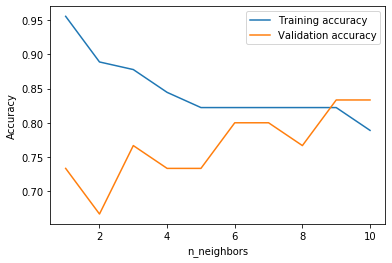

In [37]:
training_accuracy = []
validation_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,p=2,metric='minkowski')
    clf.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    validation_accuracy.append(clf.score(X_validation, y_validation))
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, validation_accuracy, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

At this stage, you might have got a sense about the performance of different models. Let's pick the best one and verify it by implementing for your test data.

In [22]:
# Write your code here:
# knn_best=
print("Accuracy on training set: {:.3f}".format(knn_best.score(X_test, y_test)))

NameError: name 'knn5' is not defined

# K-Nearest Neighbors Regression
There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s generate some data for regression purpose and then plot the dataset.

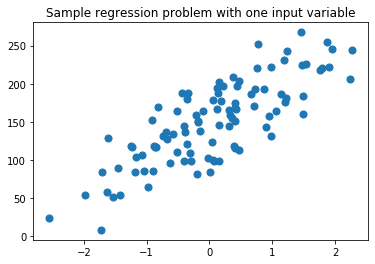

In [39]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

Now, we call the KNN regressor from the library and again divide the data into training, validation, and test sets.

In [59]:
from sklearn.neighbors import KNeighborsRegressor

(X_train, X_vt, y_train, y_vt) = train_test_split(X_R1, y_R1, test_size=0.4)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5)

R-squared test score: 0.610


Here, we evaluate the regressor by considering 5 neighbor data points. To do so, we print the training and validation accuracies.

In [64]:
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
print('R-squared training score: {:.3f}'
     .format(knnreg.score(X_train, y_train)))
print('R-squared validation score: {:.3f}'
     .format(knnreg.score(X_validation, y_validation)))

R-squared training score: 0.719
R-squared validation score: 0.610


Let's plot the predicted data points against the true values for KNN regressors with 1, 3, and 5 neighbors in a discrete fashion. 

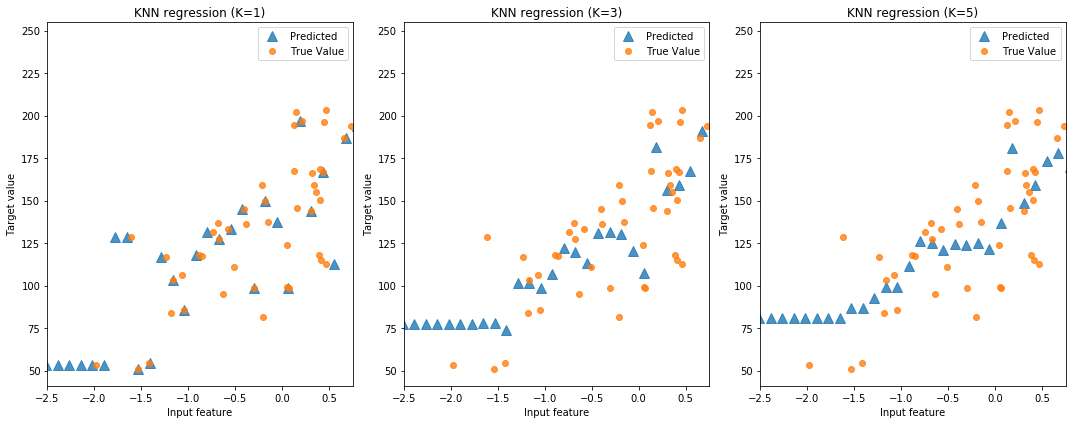

In [68]:
fig, subaxes = plt.subplots(1, 3, figsize=(15,6))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1, 3, 5]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

Again, we plot the results of the KNN regressor but with a fitted continuous line through the data points.

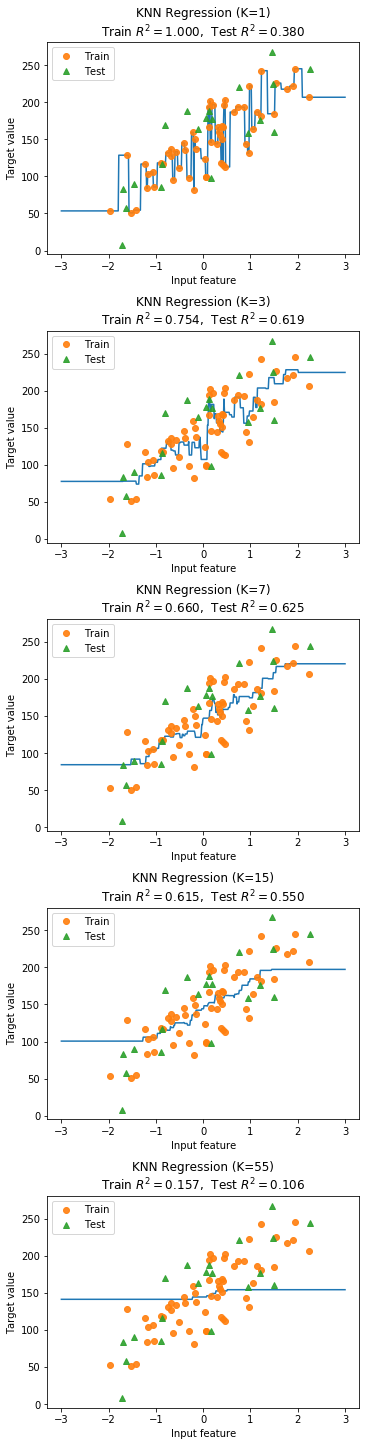

In [61]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)

for thisaxis, K in zip(subaxes,[1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    validation_score = knnreg.score(X_validation, y_validation)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_validation, y_validation, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, validation_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

And finally, based on the above results, we may guess what range of values for the neighbors are more reasonable. Let's compare the validation and training data in terms of the accuracy measure.

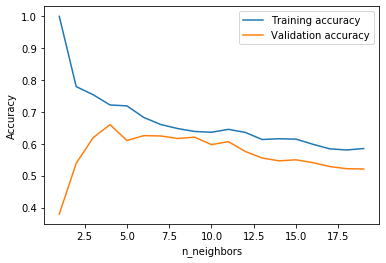

In [69]:
training_accuracy = []
validation_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    validation_accuracy.append(clf.score(X_validation, y_validation))
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, validation_accuracy, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()